# Figure 4 finalisation 

In [6]:
library(cowplot)
library(tidyverse)
library(ggrepel)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.2.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::lag()       masks stats::lag()
✖ lubridate::stamp() masks cowplot::stamp()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# Load inputs 

In [7]:
barplot.input = readRDS("../prognostic_model_development/barplot_input.rds")
scatterplot.input = readRDS("../prognostic_model_development/scatter_plot_input.rds")
forestplot.input = readRDS("../prognostic_model_development/forest_plot_input.rds")

In [8]:
head(barplot)

                         
1 function (height, ...) 
2 UseMethod("barplot")   

In [9]:
barplot.input$Feature = map_chr(barplot.input$Feature, function(x){stringr::str_remove(x, ".clin")})

In [10]:
# Barplot based on freq for sig models 
gg.barplot.sig = barplot.input %>%  
            ggplot(aes(x = reorder(Feature, Freq), y = Freq,  fill = Type)) + 
            geom_bar(stat="identity", colour = "black") + coord_flip() + theme_classic() +
            scale_y_continuous(limits = c(0, 30), breaks = seq(from = 0, to = 30, by = 5) , expand = c(0, 0)) + 
            labs(y = "Frequency") + theme(axis.text = element_text(size = 14),
                                          axis.text.x = element_text(colour = "black"), 
                                          axis.text.y = element_text(colour = "black"),
                                          axis.title.y = element_blank(),
                                          legend.position = "None")

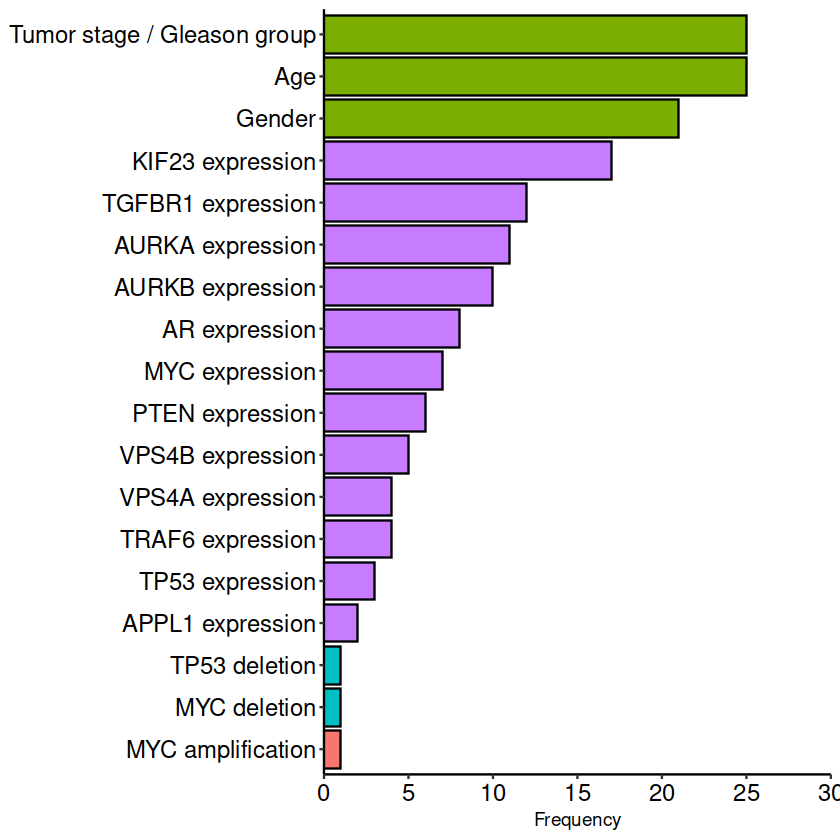

In [11]:
gg.barplot.sig

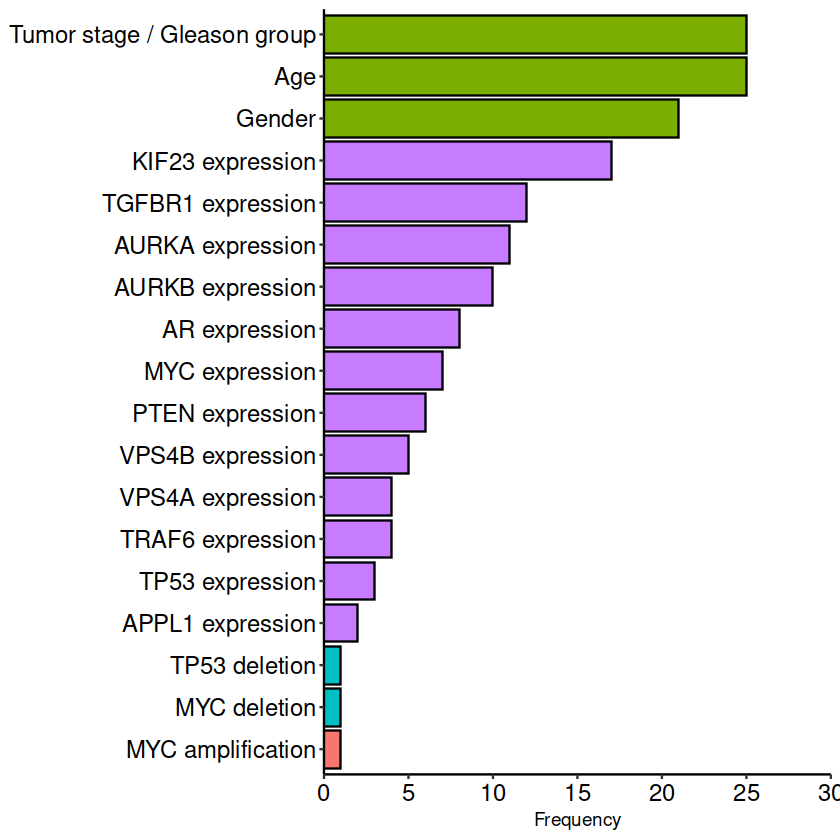

In [12]:
gg.barplot.sig

In [13]:
head(scatterplot.input)

,y,x,cancer.type,end.point
,<dbl>,<dbl>,<chr>,<chr>
1,0.104805804,0.42875842,ACC,OS
2,0.003725507,0.99321340,ACC,DSS
3,0.583601970,0.13921578,ACC,DFI
4,0.010589415,0.69188741,ACC,PFI
5,0.003973503,0.03195544,BLCA,OS
6,0.003146102,0.01607706,BLCA,DSS


In [36]:
ggsave(plot = gg.barplot.sig, filename = "barplot_significant_feature_counts.pdf", height = 6, width = 6)

In [15]:
gg.scatter.bp = scatterplot.input %>% 
    ggplot(aes(-log10(x), -log10(y), colour = end.point, label = cancer.type)) + geom_text_repel(size = 4) + geom_point(size = 4) + theme_minimal() + 
    geom_vline(xintercept = -log10(0.05), linetype = "dashed") + 
    geom_hline(yintercept = -log10(0.05), linetype = "dashed") + 
    scale_color_manual(values = c("DSS"="#0077BB", 
                                  "DFI"="#EE3377", 
                                  "OS"="#EE7733",
                                  "PFI"="#009988")) + 
    theme(axis.text = element_text(size = 14),
          axis.text.x = element_text(colour = "black"),
          axis.text.y = element_text(colour = "black"),
          axis.title.x = element_blank(),
          axis.title.y = element_blank(),
          legend.position="top") +
    xlim(c(0,8)) + ylim(c(0,8)) + coord_fixed()

In [16]:
gg.scatter = scatterplot.input %>% 
    ggplot(aes(-log10(x), -log10(y), colour = end.point, label = cancer.type)) + geom_text_repel(size = 3) + geom_point(size = 3) + theme_minimal() + 
    geom_vline(xintercept = -log10(0.05), linetype = "dashed") + 
    geom_hline(yintercept = -log10(0.05), linetype = "dashed") + 
    scale_color_manual(values = c("DSS"="#0077BB", 
                                  "DFI"="#EE3377", 
                                  "OS"="#EE7733",
                                  "PFI"="#009988")) + 
    theme(axis.text = element_text(size = 14),
          axis.text.x = element_text(colour = "black"),
          axis.text.y = element_text(colour = "black"),
          axis.title.x = element_blank(),
          axis.title.y = element_blank(),
          legend.position="top") +
    xlim(c(0,8)) + ylim(c(0,8)) + coord_fixed()

Warning message:
“ggrepel: 74 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


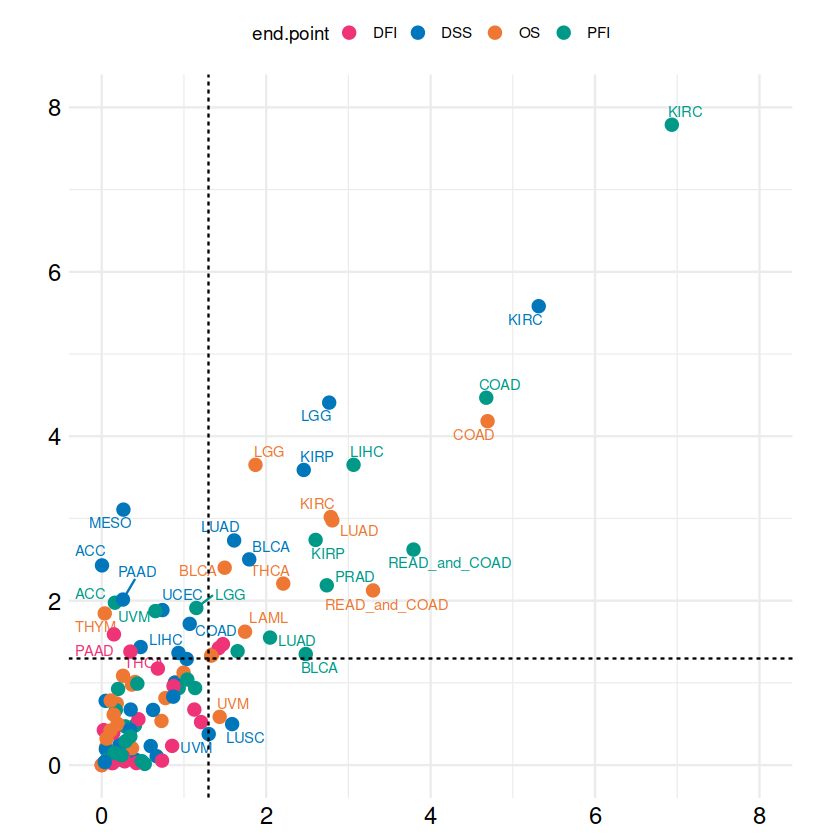

In [17]:
gg.scatter

Forest plots 

In [18]:
forest.outperf = forestplot.input$outperf %>% 
                                   ggplot() +
                                   geom_pointrange(aes(x = C.index.prog, 
                                                       y = `Model`, 
                                                       xmin = CI.lower.prog, 
                                                       xmax = CI.upper.prog, 
                                                       color = `End point`), 
                                                       position = position_dodge(width = 0.75), size=0.8) + 
                                                       scale_color_manual(values = c("DSS"="#0077BB", 
                                                                          "DFI"="#EE3377", 
                                                                          "OS"="#EE7733",
                                                                          "PFI"="#009988")) +  
                                    geom_point(data = forestplot.input$outperf, mapping = aes(x = C.index.ref, 
                                                       y = `Model`), 
                                                       position = position_dodge(width = 0.75), size=4, shape=23) + 
                                                       theme_bw() +
                                                       theme(axis.text = element_text(size = 12),
                                                            axis.text.x = element_text(colour = "black"),
                                                            axis.text.y = element_text(colour = "black")) + 
                                                       labs(y = NULL, x = "C-index") + geom_vline(xintercept = 0.5, 
                                                                                        linetype = "dashed") + xlim(c(0.25,1))

In [19]:
forest.underperf  = forestplot.input$underperf %>% 
                                   ggplot() +
                                   geom_pointrange(aes(x = C.index.prog, 
                                                       y = `Model`, 
                                                       xmin = CI.lower.prog, 
                                                       xmax = CI.upper.prog, 
                                                       color = `End point`), 
                                                       position = position_dodge(width = 0.75), size=0.8) + 
                                                       scale_color_manual(values = c("DSS"="#0077BB", 
                                                                          "DFI"="#EE3377", 
                                                                          "OS"="#EE7733",
                                                                          "PFI"="#009988")) +  
                                    geom_point(data = forestplot.input$underperf, mapping = aes(x = C.index.ref, 
                                                       y = `Model`), 
                                                       position = position_dodge(width = 0.75), size=4, shape=23) + 
                                                       theme_bw() +
                                                       theme(axis.text = element_text(size = 12),
                                                            axis.text.x = element_text(colour = "black"),
                                                            axis.text.y = element_text(colour = "black")) + 
                                                       labs(y = NULL, x = "C-index") + geom_vline(xintercept = 0.5, 
                                                                                        linetype = "dashed") + xlim(c(0.25,1))

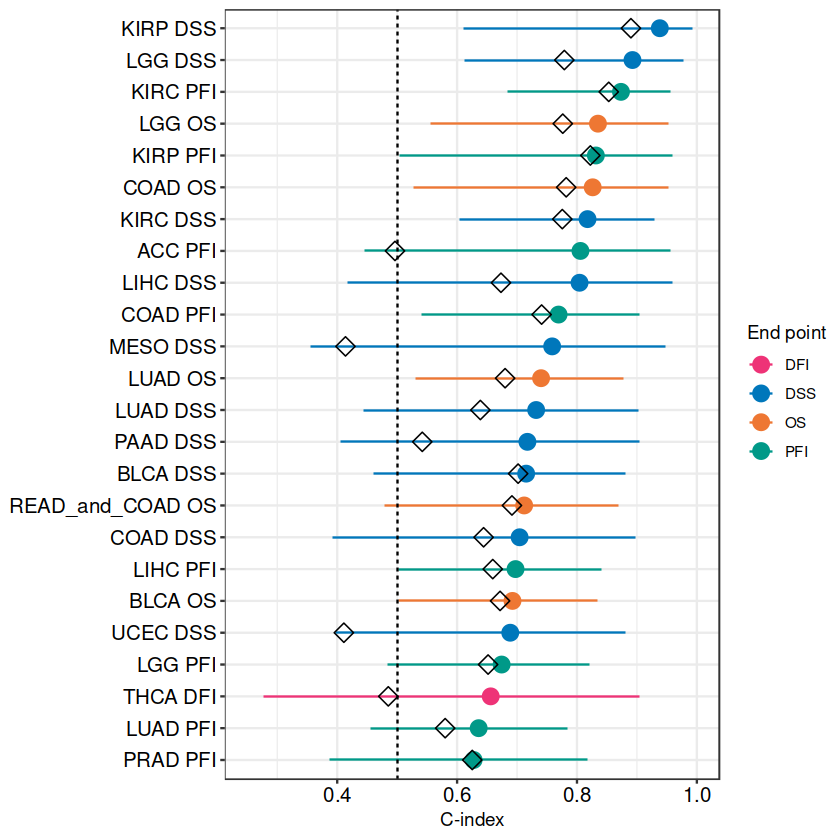

In [20]:
forest.outperf

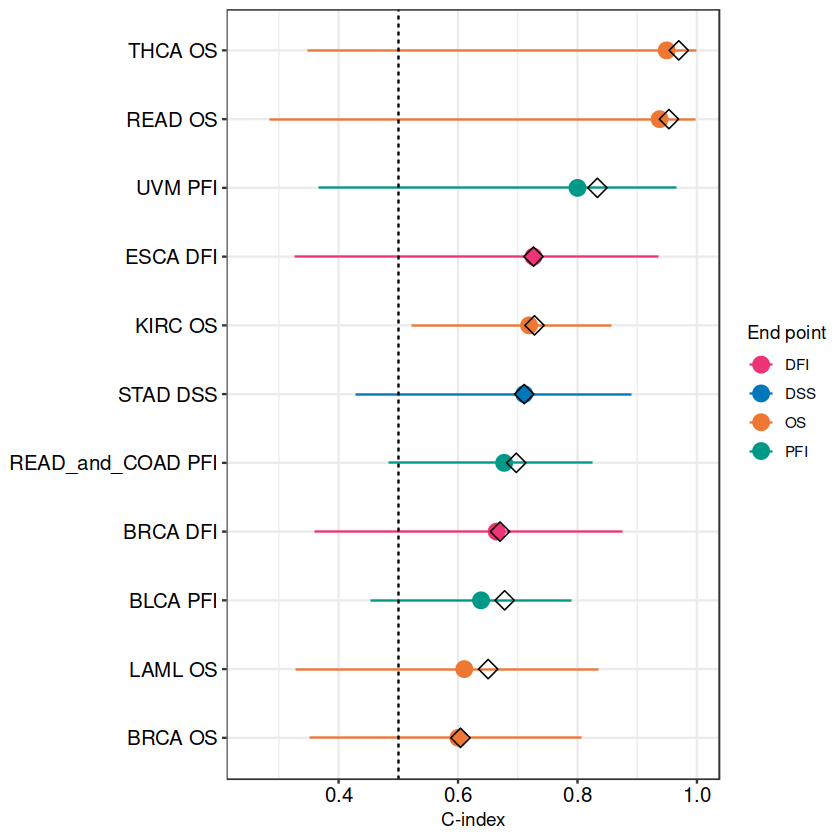

In [21]:
forest.underperf

In [22]:
plots <- align_plots(forest.outperf, forest.underperf, align = 'v', axis = 'l')
forest.comb = plot_grid(plots[[1]], plots[[2]], ncol = 1, rel_heights = c(3.125,1))

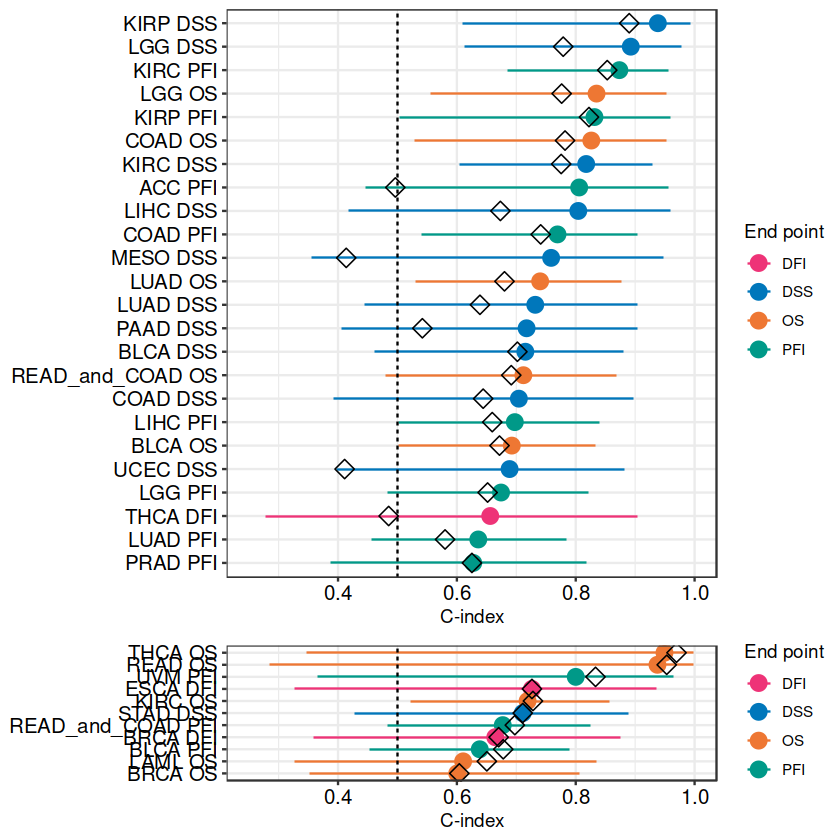

In [23]:
forest.comb

In [24]:
final.plot = plot_grid(gg.scatter, forest.comb, labels = c('a', 'b'), label_size = 24, ncol = 2, rel_widths = c(1.5, 1))

Warning message:
“ggrepel: 87 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


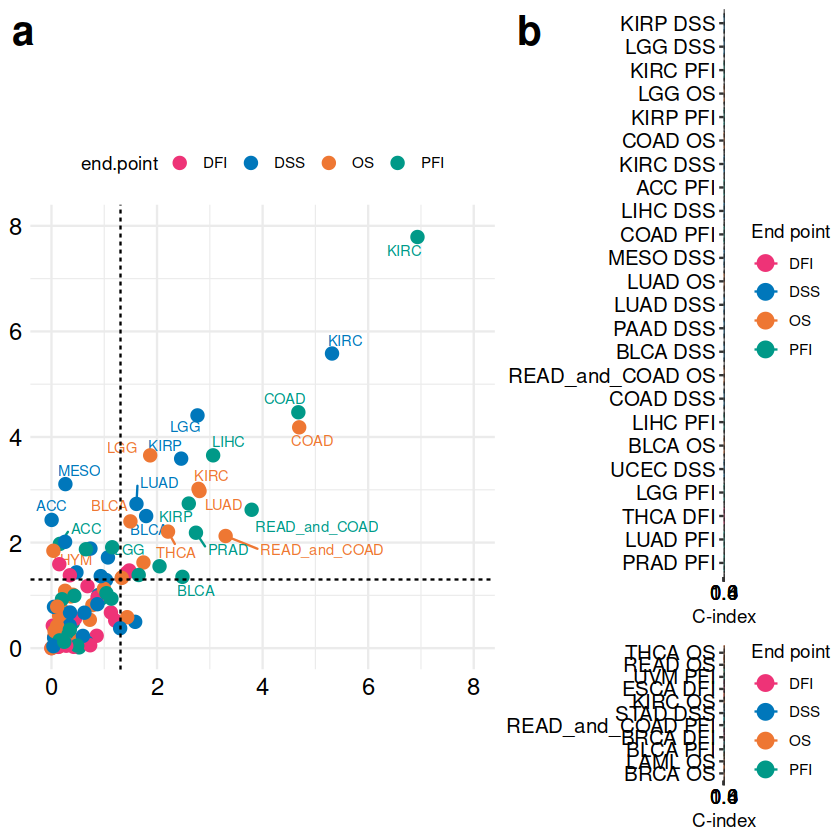

In [25]:
final.plot 

In [26]:
save_plot(plot = final.plot, filename = "test.pdf", base_height = 12, base_width = 20)

Warning message:
“ggrepel: 46 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


In [27]:
final.plot.21 = plot_grid(gg.scatter.bp , forest.comb, labels = c('a', 'b'), label_size = 24, ncol = 2, rel_widths = c(1.75, 1))

In [28]:
save_plot(plot = final.plot.21, filename = "final_figure4_AB_small.pdf", base_height = 10, base_width = 16)

Warning message:
“ggrepel: 60 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


In [29]:
print("test")

[1] "test"


In [30]:
list.files()

[1] "barplot_significant_feature_counts.pdf"
 [2] "Figure3_finalisation_revision.ipynb"   
 [3] "Figure3_finalisation.ipynb"            
 [4] "Figure4_finalisation_revision.ipynb"   
 [5] "Figure4_finalisation.ipynb"            
 [6] "Figure5_finalisation.ipynb"            
 [7] "final_figure4_AB_small.pdf"            
 [8] "Final3A.pdf"                           
 [9] "Final3B_fake.pdf"                      
[10] "Final3B.pdf"                           
[11] "Heatmaps_for_Figure2_refinement.ipynb" 
[12] "scale_test.pdf"                        
[13] "test.pdf"

In [31]:
getwd()

[1] "/home/data/project_code/landstrom_core/prognostic_model_development/r/notebooks/manuscript_figure_customisation"